  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  
✅ Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.04      0.06        26
           1       0.78      0.94      0.85        94

    accuracy                           0.74       120
   macro avg       0.46      0.49      0.46       120
weighted avg       0.64      0.74      0.68       120


Confusion Matrix:
 [[ 1 25]
 [ 6 88]]


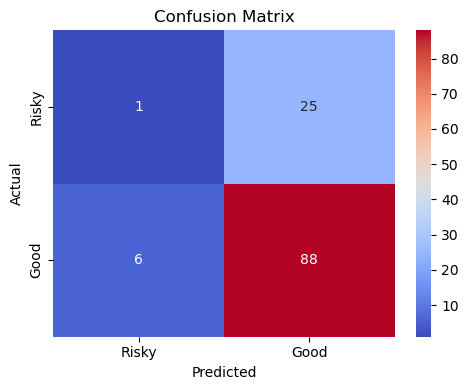

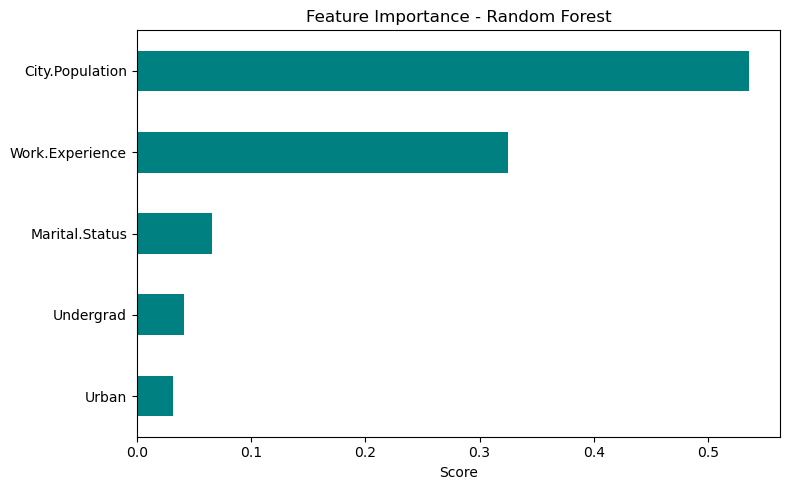

In [7]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load the dataset
frc = pd.read_csv('D:/TM/Assignment done by me/Mar/29-03-2025/Random Forest Project 9  10/10. Random Forests/Fraud_check.csv')
print(frc.head())

# Step 3: Create binary target column from Taxable_Income
frc['Taxable.Income'] = frc['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Step 4: Encode categorical columns
frc['Undergrad'] = frc['Undergrad'].map({'YES': 1, 'NO': 0})
frc['Marital.Status'] = frc['Marital.Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2})
frc['Urban'] = frc['Urban'].map({'YES': 1, 'NO': 0})
frc['Taxable.Income'] = frc['Taxable.Income'].map({'Risky': 0, 'Good': 1})

# Step 5: Define features and target
X = frc.drop('Taxable.Income', axis=1)
y = frc['Taxable.Income']

# Step 6: Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 8: Predictions and Evaluation
y_pred = rf.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
print(f"✅ Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=2))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Risky', 'Good'], yticklabels=['Risky', 'Good'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Step 10: Feature Importance Plot
feat_import = pd.Series(rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
feat_import.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Score')
plt.tight_layout()
plt.show()
